***EDA For "Telco-Customer-Churn" dataset***

Why this dataset?

In the future I would like to use the dataset to try and make a prediction model about customers that are about to churn/leave

(dataset and the follow content taken from kaggle)

 - Each row represents a customer
 - Each column contains customer's attibutes discribed below
 - The data set includes information about:

1. Customers who left within the last month – the column is called Churn

2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support,       and streaming TV and movies

3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

4. Demographic info about customers – gender, age range, and if they have partners and dependents


***COLUMNS DESCRIPTION:***



      customerID                          Unique ID assigned to each customer
      gender                              Customer’s gender (e.g., 'Male' or 'Female')
      SeniorCitizen                       Indicates if the customer is a senior citizen (1 = Yes, 0 = No)
      Partner                             Indicates if the customer has a partner(example: Husband/Wife) (Yes/No)
      Dependents                          Indicates if the customer has dependents (example: children) (Yes/No)
      tenure                              Number of months the customer has stayed with the company
      PhoneService                        Indicates if the customer subscribes to phone service (Yes/No)
      MultipleLines                       Indicates if customer has multiple phone lines (Yes/No/No phone service)
      InternetService                     Type of internet service (DSL/Fiber optic/No)
      OnlineSecurity                      Online security service (Yes/No/No internet service)
      OnlineBackup                        Online backup service (Yes/No/No internet service)
      DeviceProtection                    Device protection plan (Yes/No/No internet service)
      TechSupport                         Tech support service (Yes/No/No internet service)
      StreamingTV                         Streaming TV service (Yes/No/No internet service)
      StreamingMovies                     Streaming movies service (Yes/No/No internet service)
      Contract                            Contract term (Month-to-month, One year, Two year)
      PaperlessBilling                    Indicates if customer opts for paperless billing (Yes/No)
      PaymentMethod                       Payment method (e.g., 'Electronic check', 'Mailed check', etc.)
      MonthlyCharges                      Amount charged to the customer monthly (in USD)
      TotalCharges                        Total amount charged to the customer (in USD)
      Churn                               Indicates if the customer has left (Yes/No)


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [4]:
data = pd.read_csv('./datasets/Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
# convert 'TotalCharges' to float
data['TotalCharges']=pd.to_numeric(sub_df['TotalCharges'], errors='coerce')
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


***Correlations:***

In [29]:
numeric_cols = ['tenure','MonthlyCharges','TotalCharges']
sub_df = data[numeric_cols].copy()
# convert column from string to float 
# errors='coerce' convert missing values (like blank strings) into NaN
sub_df['TotalCharges']=pd.to_numeric(sub_df['TotalCharges'], errors='coerce')
sub_df.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


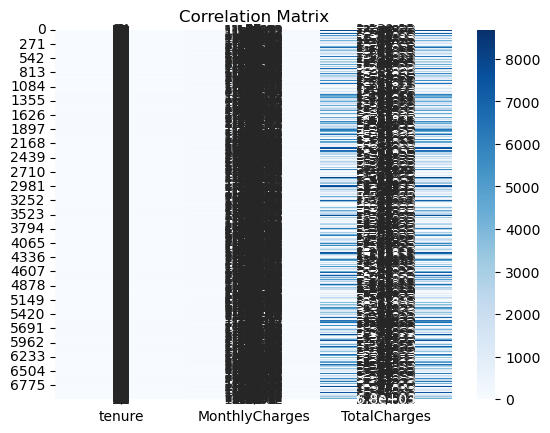

In [33]:
sns.heatmap(sub_df, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

***Do customers with shorter tenure have higher churn rates?***

In [35]:
data.groupby('Churn')['tenure'].mean()

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64

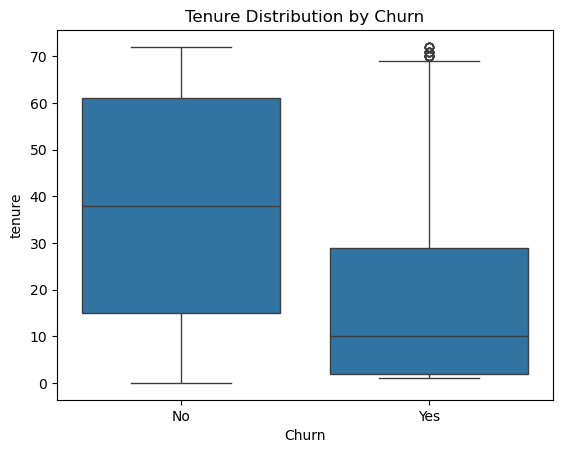

In [37]:
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure Distribution by Churn')
plt.show()

Customers who stay (Churn = No) have a much longer average tenure (38 months)                                             

than those who leave (Churn = Yes), who only stay on average 18 months

In [38]:
data.groupby('Churn')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


- ***Do customers with longer period contracts churn less? / do customers with short period contract churn more?***
- ***Churn vs. Contract***

In [46]:
# percentage (normalize='index')
pd.crosstab(data['Contract'], data['Churn'], normalize='index') 

Churn,No,Yes
Contract,,
Month-to-month,0.572903,0.427097
One year,0.887305,0.112695
Two year,0.971681,0.028319


In [45]:
pd.crosstab(data['Contract'], data['Churn'])

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


***Churn vs. PaymentMethod***

In [47]:
# percentage (normalize='index')
pd.crosstab(data['PaymentMethod'], data['Churn'], normalize='index') 

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),0.832902,0.167098
Credit card (automatic),0.847569,0.152431
Electronic check,0.547146,0.452854
Mailed check,0.808933,0.191067


In [48]:
pd.crosstab(data['PaymentMethod'], data['Churn'])

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


***Churn vs. PaperlessBilling***

In [50]:
# percentage (normalize='index')
pd.crosstab(data['PaperlessBilling'], data['Churn'], normalize='index')

Churn,No,Yes
PaperlessBilling,,
No,0.836699,0.163301
Yes,0.664349,0.335651


In [51]:
pd.crosstab(data['PaperlessBilling'], data['Churn'])

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


***Churn vs. InternetService Type***

In [53]:
# percentage (normalize='index')
pd.crosstab(data['InternetService'], data['Churn'], normalize='index')

Churn,No,Yes
InternetService,,
DSL,0.810409,0.189591
Fiber optic,0.581072,0.418928
No,0.925950,0.074050


In [54]:
pd.crosstab(data['InternetService'], data['Churn'])

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


***Churn vs. SeniorCitizen***

In [55]:
# percentage (normalize='index')
pd.crosstab(data['SeniorCitizen'], data['Churn'], normalize='index')

Churn,No,Yes
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


In [57]:
pd.crosstab(data['SeniorCitizen'], data['Churn'])

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


***Churn vs. Partner / Dependents***

In [58]:
# percentage (normalize='index')
pd.crosstab(data['Partner'], data['Churn'], normalize='index')

Churn,No,Yes
Partner,,
No,0.670420,0.329580
Yes,0.803351,0.196649


In [59]:
pd.crosstab(data['Partner'], data['Churn'])

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


***Crosstabs Visualization***

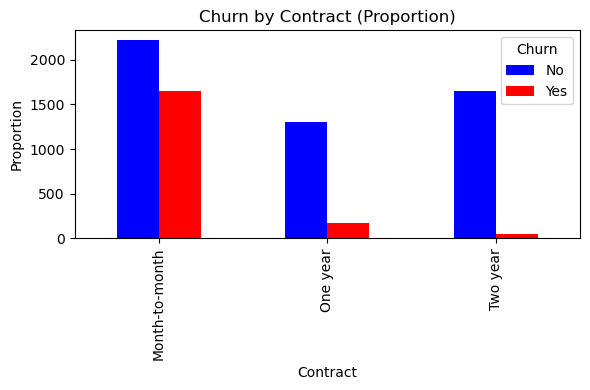

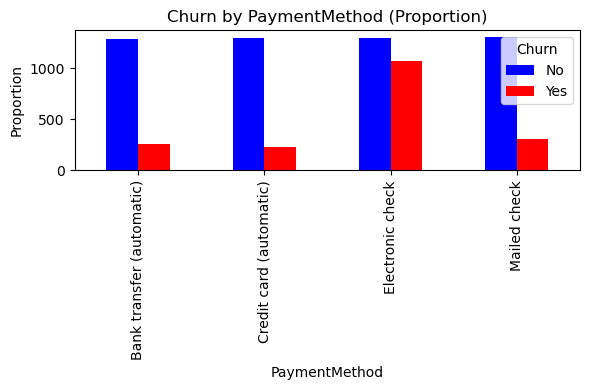

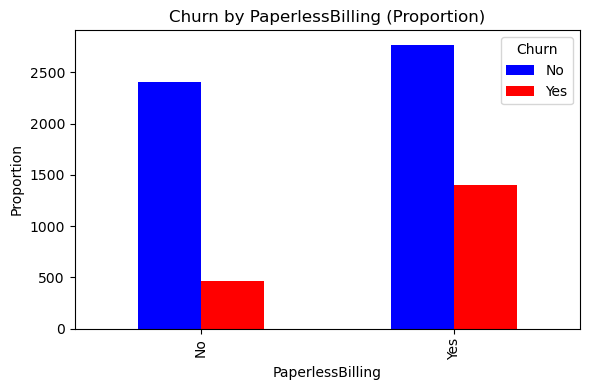

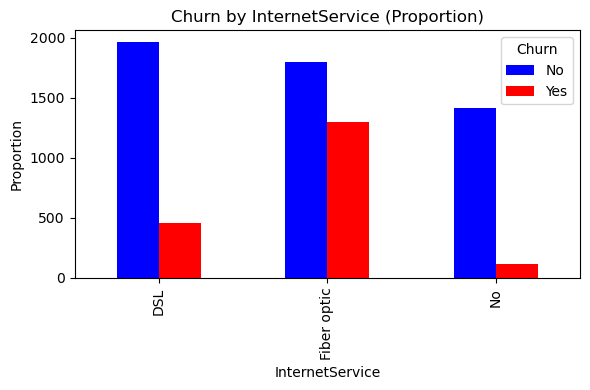

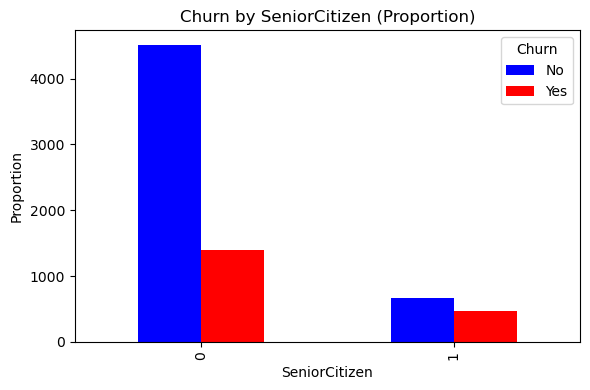

In [6]:
categorical_cols = ['Contract', 'PaymentMethod', 'PaperlessBilling', 
                    'InternetService', 'SeniorCitizen']

for col in categorical_cols:
    cross_tab = pd.crosstab(data[col], data['Churn'])
    
    cross_tab.plot(kind='bar', stacked=False, 
                   color=['blue', 'red'],  # Blue is "No", red is "Yes"
                   figsize=(6, 4))
    
    plt.title(f'Churn by {col} (Proportion)')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.legend(title='Churn', loc='upper right')
    plt.tight_layout()
    plt.show()

******T-Test******

T-statistic: 18.4075
P-value: 8.5924e-73
Result: Significant difference in average monthly charges between churners and non-churners.


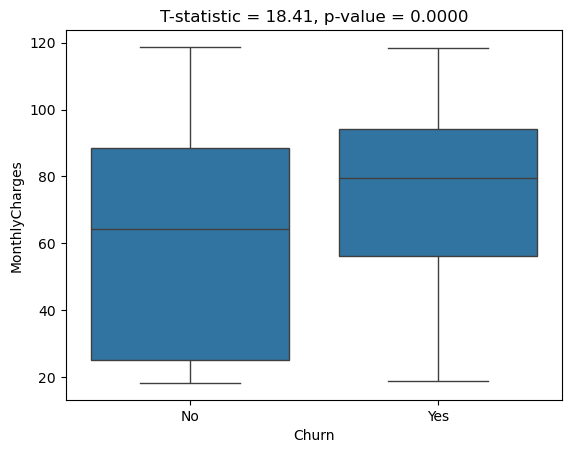

In [14]:
# Separate the MonthlyCharges data by churn status
churn_yes = data.loc[data['Churn'] == 'Yes', 'MonthlyCharges']
churn_no = data.loc[data['Churn'] == 'No', 'MonthlyCharges']

# equal_var=False meaning its a Welch's Variant (which does not assume equal population)
t_stat, p_value = stats.ttest_ind(churn_yes, churn_no, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Result: Significant difference in average monthly charges between churners and non-churners.")
else:
    print("Result: No significant difference in average monthly charges between churners and non-churners.")

sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title(f"T-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
plt.show()

T-statistic: -34.8238
P-value: 1.1955e-232
Result: Significant difference in average monthly charges between churners and non-churners.


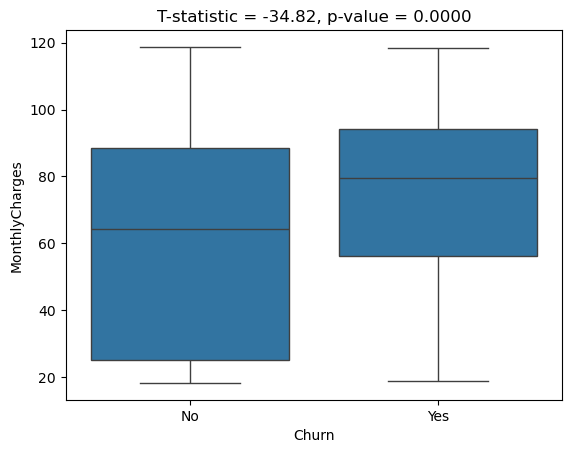

In [15]:
# Separate the tenure data by churn status
churn_yes = data.loc[data['Churn'] == 'Yes', 'tenure']
churn_no = data.loc[data['Churn'] == 'No', 'tenure']

# equal_var=False meaning its a Welch's Variant (which does not assume equal population)
t_stat, p_value = stats.ttest_ind(churn_yes, churn_no, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")

if p_value < 0.05:
    print("Result: Significant difference in tenure between churners and non-churners.")
else:
    print("Result: No significant difference in tenure between churners and non-churners.")

sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title(f"T-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
plt.show()

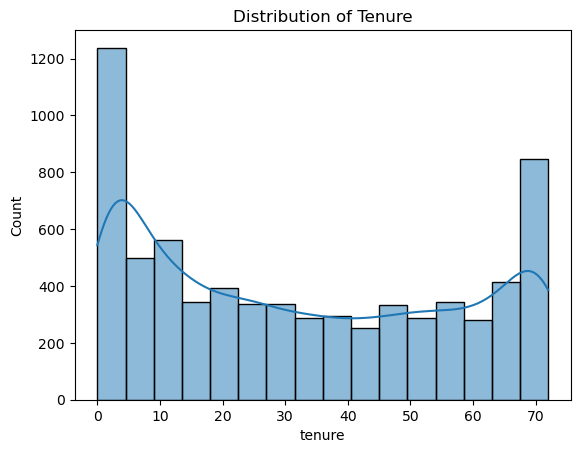

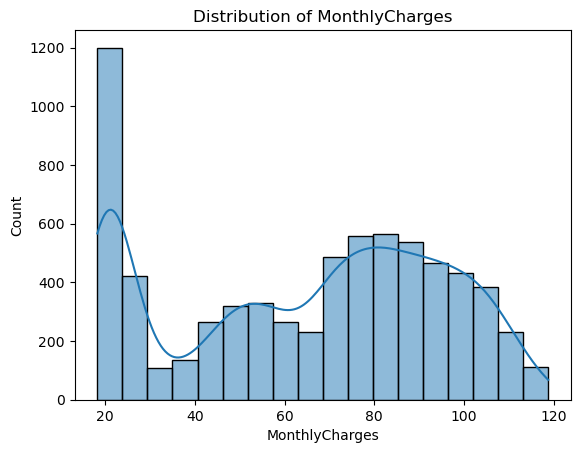

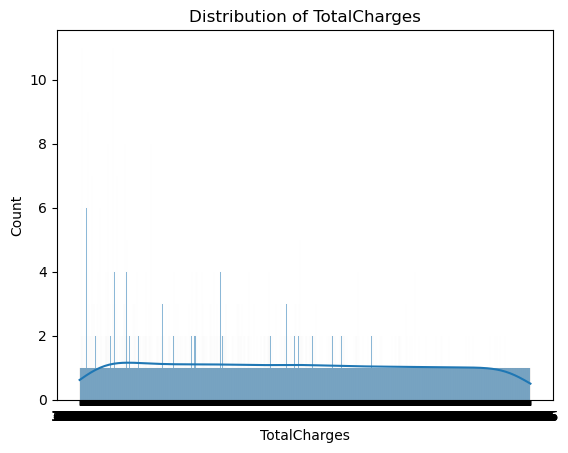

In [16]:
# For Tenure
sns.histplot(data=data, x='tenure', kde=True)
plt.title('Distribution of Tenure')
plt.show()

# For MonthlyCharges
sns.histplot(data=data, x='MonthlyCharges', kde=True)
plt.title('Distribution of MonthlyCharges')
plt.show()

# For TotalCharges (after converting to numeric, if needed)
sns.histplot(data=data, x='TotalCharges', kde=True)
plt.title('Distribution of TotalCharges')
plt.show()